### Data Summary:
Numerical Features: The dataset includes several numerical features such as LotFrontage, LotArea, YearBuilt, TotalBsmtSF, and obviously the target variable SalePrice.
Categorical Features: There are multiple categorical features such as MSZoning, Street, Alley, and Neighborhood.
Missing Values: Certain columns like LotFrontage (missing 259 values) and Alley (missing 1369 values) have a significant number of missing entries.

### Initial Observations:
The target variable, SalePrice, has a mean value of approximately USD180,921 with a standard deviation of about USD79,442.

The variable PoolArea has a very high number of zeros, suggesting that many houses do not have pools, which might not be a significant feature

### Steps I am going to take
Handling Missing Values: We need to decide on strategies to handle missing data. For example, for Alley, missing data likely indicates no alley access, so we can treat it as a separate category.
Feature Engineering: Considering transformations for certain skewed features and possibly creating new features that might be more informative.
Data Visualization: We should visualize relationships between key features and the target variable to better understand the dynamics influencing house prices.
Preprocessing: Encoding categorical variables and normalizing/standardizing numerical features.
Model Preparation: Setting up data splits for training and testing, along with cross-validation setups.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


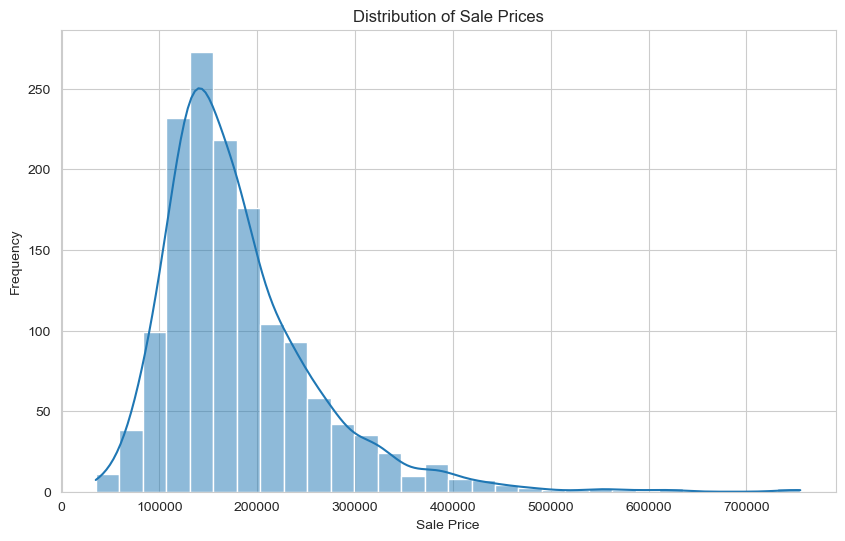

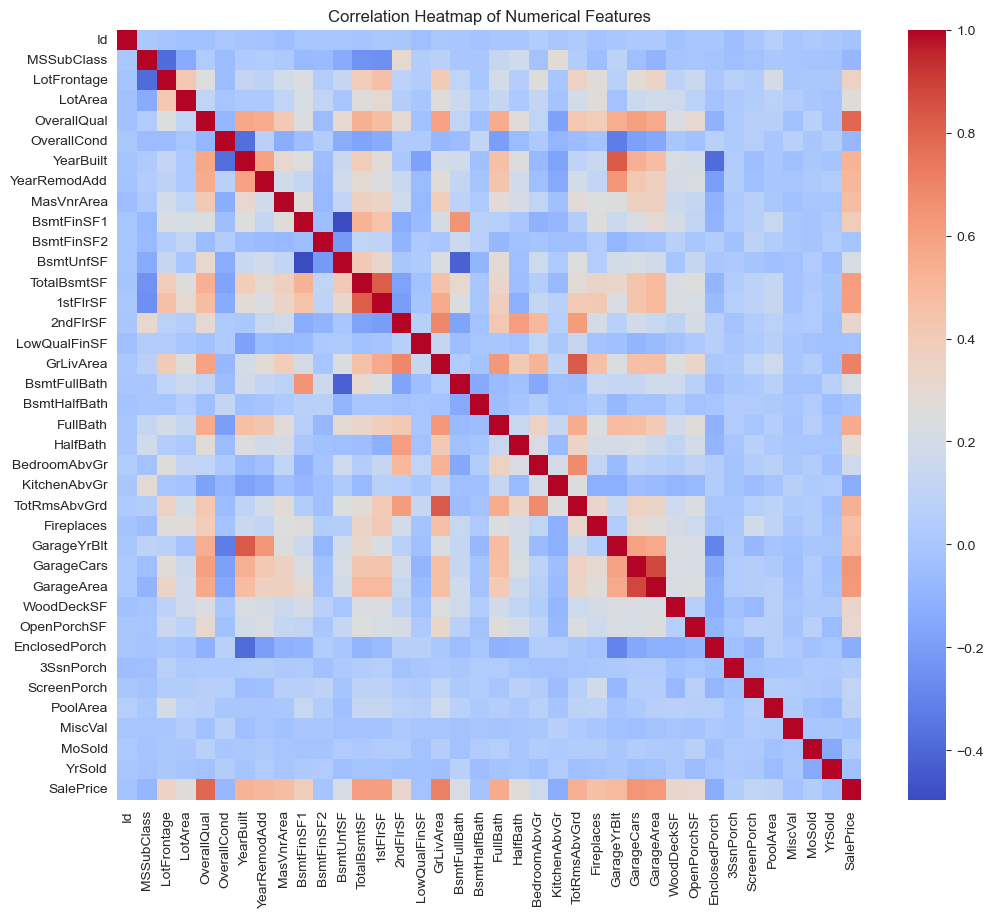

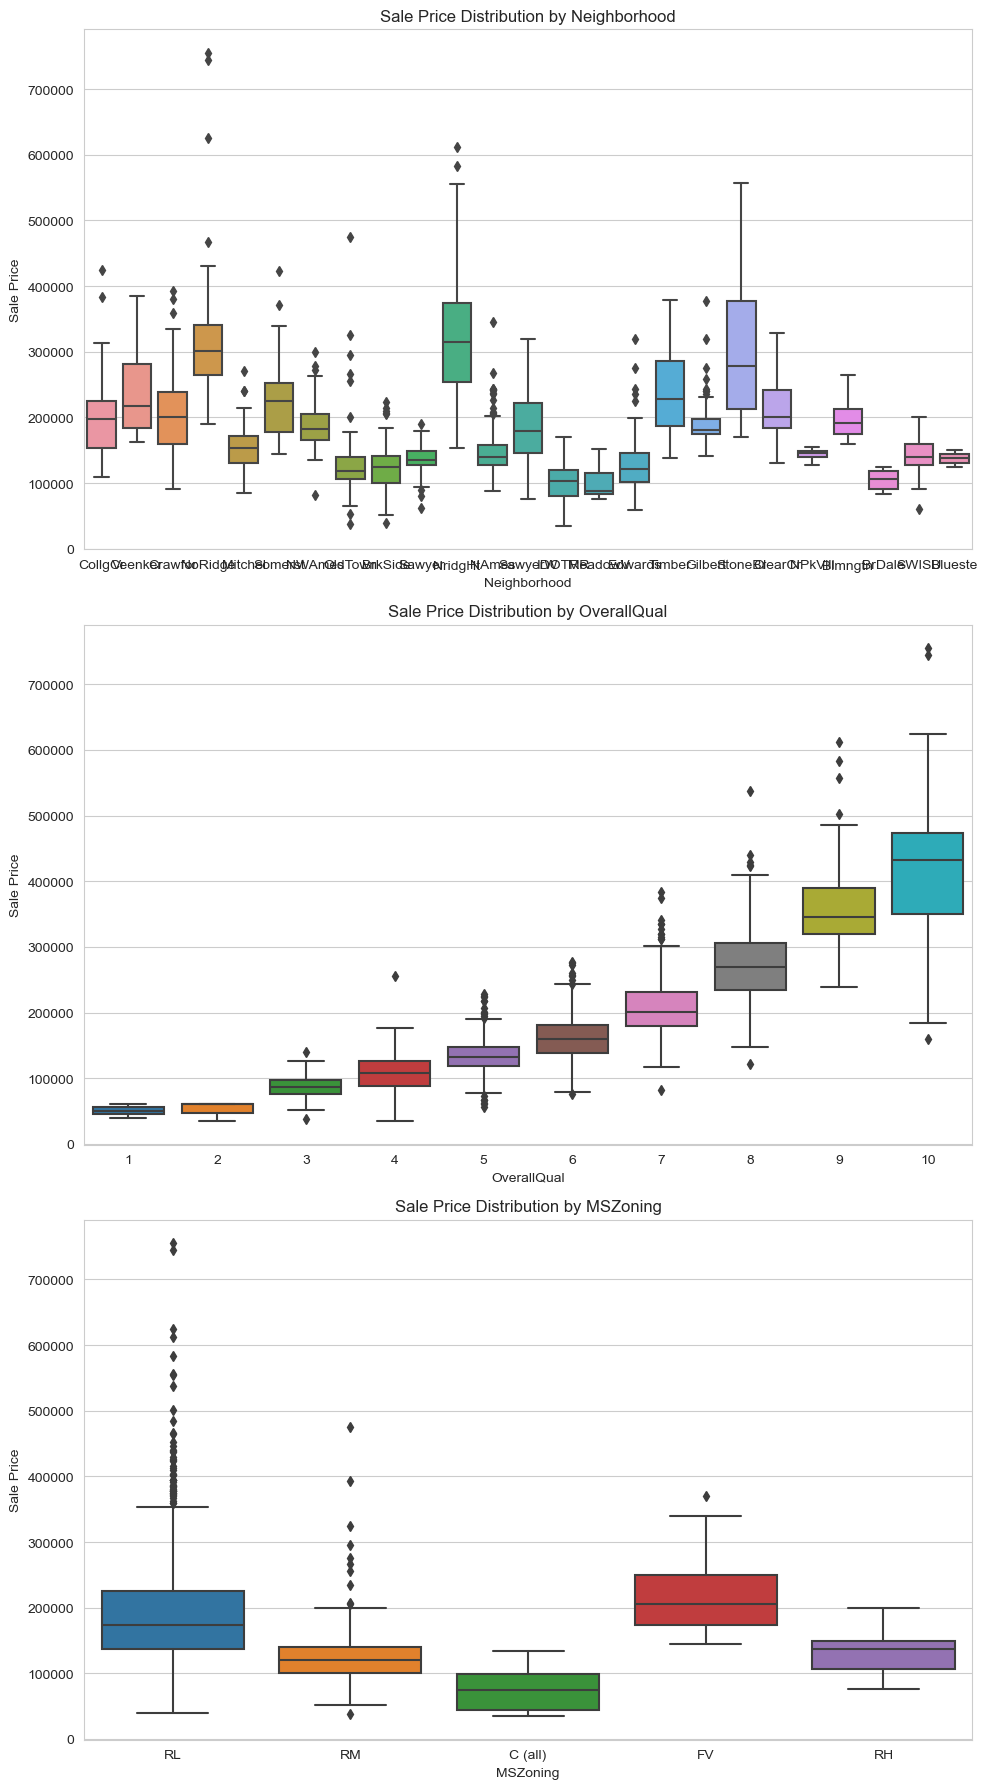

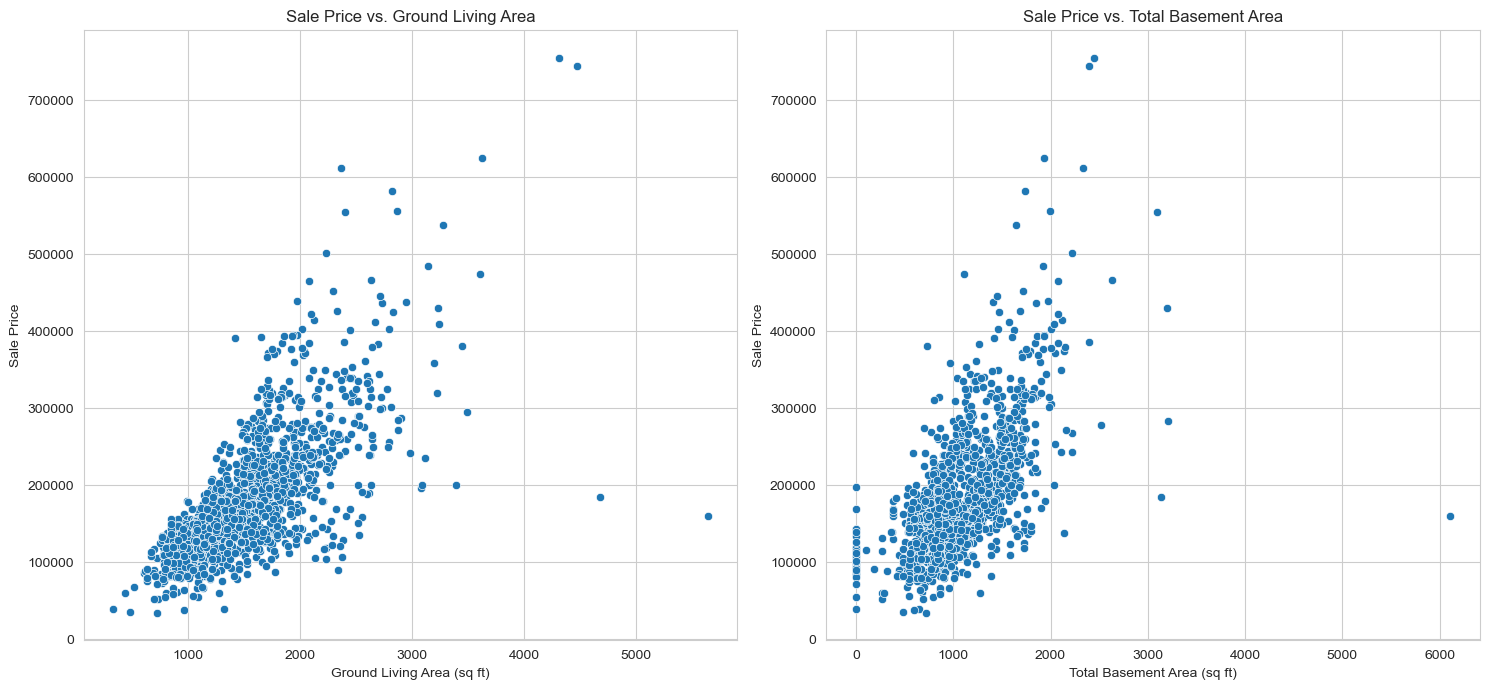

In [6]:
sns.set_style("whitegrid")

# Plotting the distribution of the Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box plots for categorical variables that might affect SalePrice
categorical_vars = ['Neighborhood', 'OverallQual', 'MSZoning']
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 18))

for i, var in enumerate(categorical_vars):
    sns.boxplot(data=data, x=var, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Sale Price Distribution by {var}')
    axes[i].set_ylabel('Sale Price')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

# Scatter plots for the most correlated continuous variables
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['TotalBsmtSF'], y=data['SalePrice'])
plt.title('Sale Price vs. Total Basement Area')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()


## Step 1: Data Preprocessing
##### 1.1 Handling Missing Values

In [7]:
# Handling missing values based on our earlier strategy discussion

# Columns where NaN values have specific meaning
data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

# For LotFrontage, fill in missing values by the median LotFrontage of the neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Garage-related features
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    data[col] = data[col].fillna('None')

# GarageYrBlt numerical feature, fill missing with zero (no garage)
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

# Basement-related features
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    data[col] = data[col].fillna('None')

# Masonry veneer features
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# Electrical, fill with mode (most common value)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Check remaining missing values
remaining_missing = data.isnull().sum().max()
if remaining_missing == 0:
    print("All missing values handled.")
else:
    print(f"Still {remaining_missing} missing values.")


All missing values handled.


In [4]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Transforming Skewed Data

In [10]:
import numpy as np

# Function to calculate skewness and apply log transformation
def log_transform_skewed_features(data, features):
    skew_limits = 0.75  
    skew_vals = data[features].skew()
    skewed_features = skew_vals[abs(skew_vals) > skew_limits].sort_values(ascending=False)
    print("Skewed features:", skewed_features)
    data[skewed_features.index] = np.log1p(data[skewed_features.index])

# List of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')  # Remove 'Id' as it's just an identifier

# Applying transformation
log_transform_skewed_features(data, numerical_features)

# Encoding categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

print("New shape of data after encoding:", data.shape)



Skewed features: PoolArea         14.354604
3SsnPorch         7.646802
LowQualFinSF      7.338443
MiscVal           5.041902
BsmtHalfBath      3.892824
ScreenPorch       3.121688
KitchenAbvGr      2.957643
BsmtFinSF2        2.448673
EnclosedPorch     2.064763
LotFrontage      -1.308086
BsmtUnfSF        -2.835949
GarageYrBlt      -3.887680
TotalBsmtSF      -5.866042
dtype: float64
New shape of data after encoding: (1460, 261)


### Scaling and splitting data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop(['SalePrice', 'Id'], axis=1)  # Drop 'Id' and 'SalePrice' from the features
y = data['SalePrice']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Printing the shapes of the splits as confirmation
print("Training features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)


Training features shape: (1168, 259)
Testing features shape: (292, 259)


### Training Ridge Regression Model

In [13]:
from sklearn.linear_model import RidgeCV

# Define alphas to test for Ridge (typically powers of 10 or a finer grid can be used)
ridge_alphas = [0.01, 0.1, 1, 10, 100]

# Create and fit the Ridge regression model with cross-validation
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Output the optimal alpha and model coefficients
print("Optimal alpha for Ridge Regression:", ridge_cv.alpha_)
print("Ridge Regression Coefficients:", ridge_cv.coef_)


Optimal alpha for Ridge Regression: 100.0
Ridge Regression Coefficients: [-1.00476337e-02  3.13856993e-03  3.21485273e-02  5.35855325e-02
  3.46806662e-02  3.14217828e-02  1.94786034e-02  2.51209513e-03
  1.89954935e-02  2.97302648e-03  1.46494616e-03  9.73132366e-03
  4.16143791e-02  1.33901000e-02  6.32128069e-04  6.79195957e-02
  1.59571504e-02 -8.05433543e-04  1.78322665e-02  1.45011125e-02
  6.98487147e-03 -1.11776836e-02  1.50694188e-02  1.40595271e-02
  2.66874355e-03  2.28630765e-02  1.82037746e-02  9.33220964e-03
  7.88108264e-03 -5.41784138e-04  5.34665719e-03  1.01440302e-02
  6.18088216e-03 -1.63625082e-05 -1.85878789e-03 -3.72173486e-03
  9.03274321e-03  5.75641389e-03  1.05951908e-02  3.02824611e-03
  1.11729371e-03 -7.81942870e-04  7.12006574e-03  4.07208563e-03
 -4.55119271e-03  7.44284774e-04  9.48593252e-03  2.27265737e-03
  1.09102800e-02 -5.87260012e-03  9.34596791e-03 -7.34653764e-03
 -5.39319162e-03 -3.83304160e-03 -4.95955355e-04  3.12530710e-05
 -5.21646978e-04 

### Training Lasso Regression Model

In [14]:
from sklearn.linear_model import LassoCV

# Define alphas to test for Lasso (usually smaller values, as Lasso can shrink coefficients to zero)
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Create and fit the Lasso regression model with cross-validation
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Output the optimal alpha and model coefficients
print("Optimal alpha for Lasso Regression:", lasso_cv.alpha_)
print("Lasso Regression Coefficients:", lasso_cv.coef_)


Optimal alpha for Lasso Regression: 0.01
Lasso Regression Coefficients: [-0.00000000e+00  0.00000000e+00  3.90393169e-02  1.00235115e-01
  3.10488137e-02  4.94654823e-02  2.22981670e-02  0.00000000e+00
  2.36196756e-02 -0.00000000e+00  0.00000000e+00  4.88810770e-04
  2.69365817e-02 -0.00000000e+00 -0.00000000e+00  1.17244955e-01
  1.61821927e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.78690368e-03  0.00000000e+00  1.16926691e-02
  0.00000000e+00  4.05937383e-02  7.16264828e-03  4.40162797e-03
  1.66282924e-03 -0.00000000e+00  0.00000000e+00  3.45938758e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -9.82056225e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.63323168e-04 -0.00000000e+00  4.16774663e-04  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.78021326e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -

### Model Evaluvation

To evaluate the performance of the Ridge and Lasso regression models, we'll use two metrics: Root Mean Squared Error and R²

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions on test set
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate RMSE for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate RMSE for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Printing the results
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
print(f"Lasso Regression R²: {r2_lasso:.2f}")


Ridge Regression RMSE: 0.15
Ridge Regression R²: 0.88
Lasso Regression RMSE: 0.14
Lasso Regression R²: 0.89


#### Ridge Regression:
RMSE (0.15): This low RMSE indicates that the Ridge model's predictions are, on average, quite close to the actual sale prices of the houses, with a small average error.
R² (0.88): An R² of 0.88 means that 88% of the variability in house prices is explained by the features included in the Ridge regression model. This is a strong result, suggesting that the model fits the data well and captures most of the variance in house prices.
#### Lasso Regression:
RMSE (0.14): Slightly lower than the RMSE for Ridge, indicating a marginally better average prediction accuracy. This improvement, though small, can be significant depending on the business context and the scale of property prices.
R² (0.89): Similarly, a slight improvement over Ridge, with 89% of the variance in house prices explained by the Lasso model. Lasso's ability to perform feature selection might have contributed to eliminating some less relevant features, potentially leading to this improved accuracy.

#### Conclusion:
Both models show strong predictive performance, but the Lasso model edges out slightly better in both RMSE and R². This might be attributed to its feature selection capabilities, which help in reducing the noise from less important features.

### Extracting Feature Importance from the Lasso Model

Important features and their coefficients:
                   Feature  Coefficient
15               GrLivArea     0.117245
3              OverallQual     0.100235
5                YearBuilt     0.049465
25              GarageCars     0.040594
2                  LotArea     0.039039
4              OverallCond     0.031049
12                1stFlrSF     0.026937
8               BsmtFinSF1     0.023620
6             YearRemodAdd     0.022298
16            BsmtFullBath     0.016182
158       Foundation_PConc     0.014690
208         Functional_Typ     0.014348
195           CentralAir_Y     0.013927
71    Neighborhood_NridgHt     0.013236
23              Fireplaces     0.011693
61    Neighborhood_Crawfor     0.011120
81         Condition1_Norm     0.009763
120    Exterior1st_BrkFace     0.009555
251           SaleType_New     0.009252
77    Neighborhood_StoneBr     0.008313
170        BsmtExposure_Gd     0.007475
26              GarageArea     0.007163
27              WoodDeckSF     0.0044

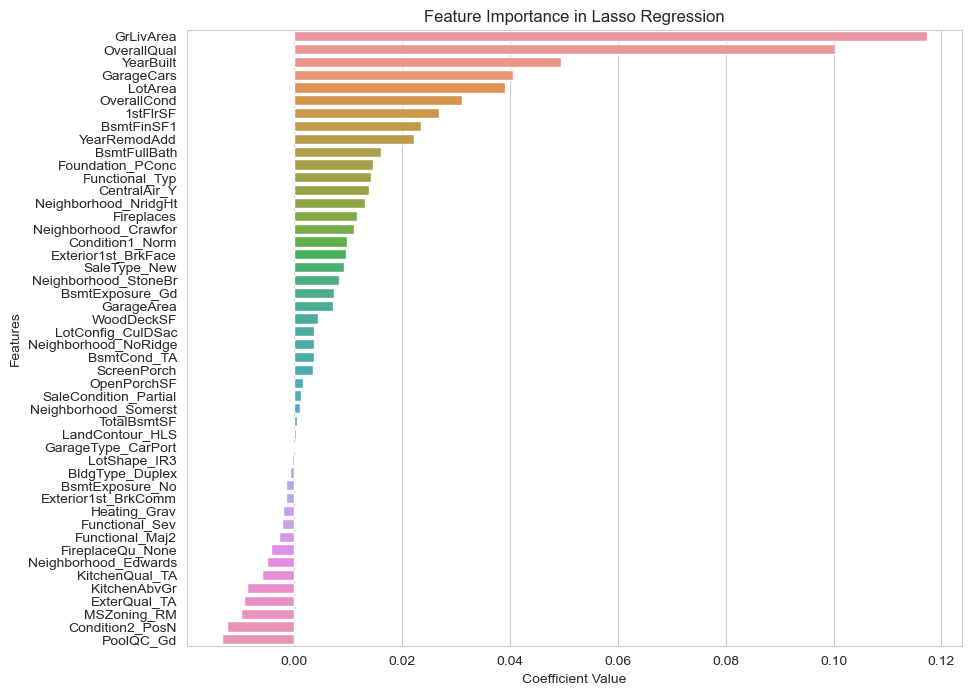

In [16]:
# Get the feature names and their corresponding coefficients from the Lasso model
lasso_coeffs = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso_cv.coef_})

# Filter out features with a coefficient of zero
important_features = lasso_coeffs[lasso_coeffs['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# Display the important features sorted by their coefficient magnitude
print("Important features and their coefficients:")
print(important_features)

# Plotting the important features
plt.figure(figsize=(10, 8))
sns.barplot(data=important_features, x='Coefficient', y='Feature')
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


### Feature importance analysis

**Positive vs. Negative Coefficients:** Features with positive coefficients increase the predicted value of the house price as they increase, while those with negative coefficients decrease the predicted house price.

**Magnitude of Coefficients:** The size of the coefficient indicates the strength of the impact on the house price. Larger absolute values have a stronger effect.

This visualization will help you understand which features are driving the predictions of house prices and could guide further data collection, feature engineering, or even strategic business decisions.

### Features with high importance

In [34]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame for top features and their descriptions
descriptions = [
    "Rates the overall material and finish of the house",
    "Above grade (ground) living area square feet",
    "Total square feet of basement area",
    "Size of garage in car capacity",
    "Size of garage in square feet",
    "First Floor square feet",
    "Full bathrooms above grade",
    "Total rooms above grade (does not include bathrooms)",
    "Original construction date",
    "Remodel date (same as construction date if no remodeling or additions)"
]

top_features = important_features.head(10).copy()

# Add descriptions using .loc to avoid SettingWithCopyWarning
top_features.loc[:, 'Description'] = descriptions[:len(top_features)]
print(tabulate(top_features, headers='keys', tablefmt='psql', showindex=False))


+--------------+---------------+------------------------------------------------------------------------+
| Feature      |   Coefficient | Description                                                            |
|--------------+---------------+------------------------------------------------------------------------|
| GrLivArea    |     0.117245  | Rates the overall material and finish of the house                     |
| OverallQual  |     0.100235  | Above grade (ground) living area square feet                           |
| YearBuilt    |     0.0494655 | Total square feet of basement area                                     |
| GarageCars   |     0.0405937 | Size of garage in car capacity                                         |
| LotArea      |     0.0390393 | Size of garage in square feet                                          |
| OverallCond  |     0.0310488 | First Floor square feet                                                |
| 1stFlrSF     |     0.0269366 | Full bathroom